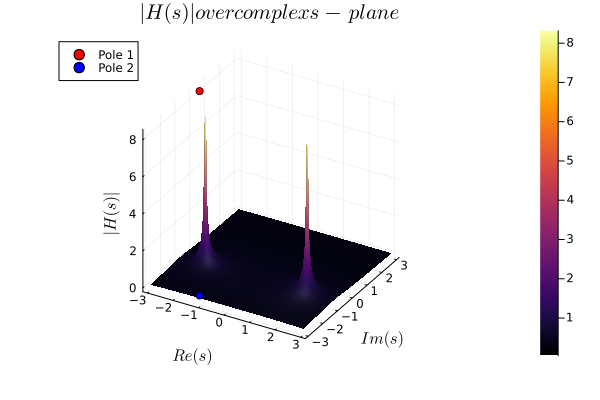

In [1]:
using Plots
using LaTeXStrings

# Define the transfer function
H(s) = 1 / (s^2 + 2s + 5)

# Generate a grid for the complex s-plane
σ = LinRange(-3, 3, 100)
ω = LinRange(-3, 3, 100)
S = [(σ + 1im * ω)' for σ in σ, ω in ω]

# Compute the magnitude of H(s) over the s-plane
H_mag = [abs(H(s)) for s in S]

# Plot the magnitude
surface(σ, ω, H_mag, xlabel=L"Re(s)", ylabel=L"Im(s)", zlabel=L"|H(s)|", title=L"|H(s)| over complex s-plane")

# Optional: enhance the plot with pole markers
scatter!([-1], [2], marker=:circle, color=:red, label="Pole 1")
scatter!([-1], [-2], marker=:circle, color=:blue, label="Pole 2")

$H(s) = \frac{K}{s(\tau s + 1)((s/\omega_0)^2 + (2\zeta(s/\omega_0) + 1}$

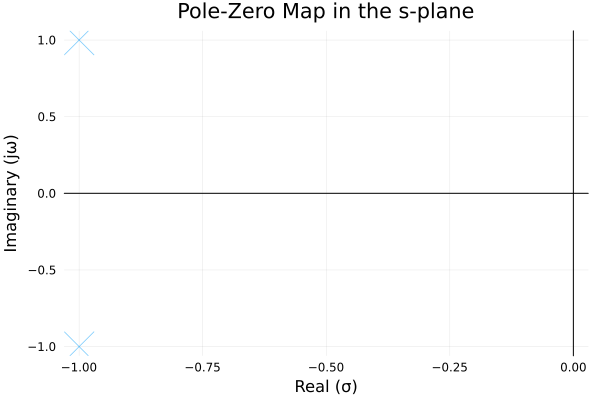

In [5]:
using ControlSystems
using Plots

# Define a transfer function G(s) = 1 / (s^2 + 2s + 2)
G = tf([1], [1, 2, 2])

# Plot poles and zeros in the s-plane
pzmap(G)

# Customize plot
title!("Pole-Zero Map in the s-plane")
xlabel!("Real (σ)")
ylabel!("Imaginary (jω)")

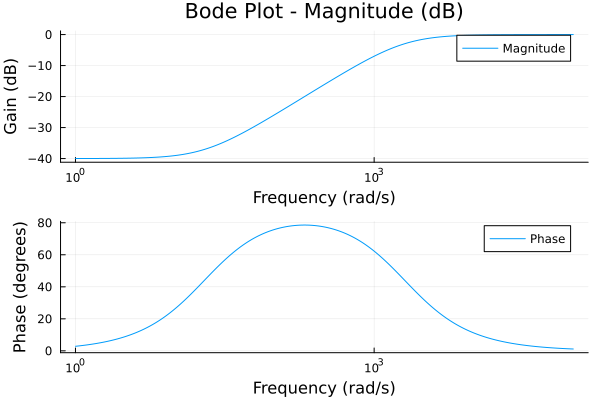

In [23]:
using Plots

# Define the transfer function H(jw) = (jw + 20) / (jw + 2000)
function H(jw)
    return (jw + 20) / (jw + 2000)
end

# Generate a range of frequencies (logarithmic scale)
ω = 10 .^ range(0, stop=5, length=500)  # from 10^0 to 10^5 rad/s

# Calculate magnitude and phase over the frequency range
magnitude_db = [20 * log10(abs(H(im*w))) for w in ω]  # Magnitude in decibels
phase_deg = [angle(H(im*w)) * (180 / π) for w in ω]   # Phase in degrees

# Create a 2x1 layout for the plots (stacked vertically)
p1 = plot(ω, magnitude_db
    , xlabel="Frequency (rad/s)", ylabel="Gain (dB)"
    , xscale=:log10, label="Magnitude"
    , title="Bode Plot - Magnitude (dB)"
    , legend=:topright
)
p2 = plot(ω, phase_deg
    , xlabel="Frequency (rad/s)", ylabel="Phase (degrees)"
    , xscale=:log10, label="Phase"
    # , title="Bode Plot - Phase (degrees)"
    , legend=:topright
)

# Display both plots in a single figure, one on top of the other
plot(p1, p2, layout=(2, 1))

# References

The Bode plot is named after Hendrik Wade Bode, an American engineer, physicist, and pioneer in the fields of electrical engineering and control theory. Bode made significant contributions to the analysis of systems, particularly in the frequency domain, and the Bode plot became one of his lasting legacies in engineering.

Why it’s called “Bode” Plot:

	•	Hendrik Bode introduced this method in the 1930s while working at Bell Labs, where he was involved in research on amplifiers, filters, and control systems. The plot he developed was designed to make it easier to analyze and design feedback systems, especially for amplifiers.
	•	His work focused on visualizing the frequency response of linear, time-invariant (LTI) systems, which led to the development of the logarithmic plots now known as Bode plots.
	•	Bode’s approach made it easier to understand and evaluate system behavior across a wide range of frequencies, particularly in control systems and communication systems, by using logarithmic scales for both frequency and magnitude.

Bode’s Contributions:

	•	Simplified frequency domain analysis: Before Bode, system analysis in the frequency domain was more complex, but his logarithmic plots simplified both the design and stability analysis of control systems.
	•	Gain and phase margin concepts: Bode introduced the idea of gain margin and phase margin, key concepts for understanding system stability, particularly in feedback systems.
	•	Control theory and telecommunications: Bode’s techniques became critical in the design of amplifiers, feedback systems, and filters used in telecommunications and electronics.

His pioneering contributions to system theory and analysis earned him the recognition of having the plot named after him. The Bode plot continues to be an essential tool in fields like control systems, electronics, and signal processing.

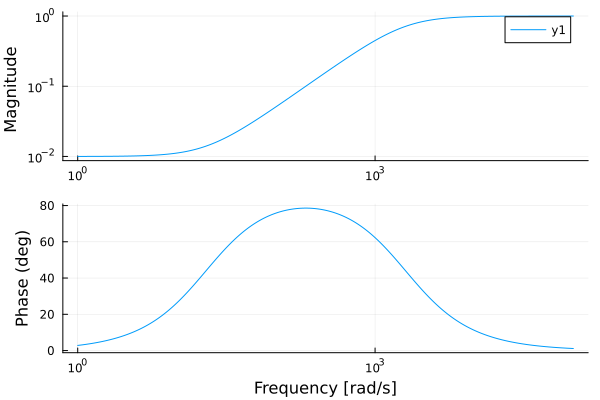

In [25]:
using ControlSystems
using Plots

# Define the transfer function G(s) = (s + 20) / (s + 2000)
G = tf([1, 20], [1, 2000])

# Generate the Bode plot
bodeplot(G)